In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

2023-03-16 06:37:46.058137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load data

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10_000)

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# Decoding indice to word

word_index = imdb.get_word_index()

reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]] # indeice are offset by 3 reserve for padding, start of sequence, unknow
)

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
# multi-hot encoder

mlb = MultiLabelBinarizer(classes=np.array(range(0,10_000)))
X_train = mlb.fit_transform(train_data)
X_test = mlb.transform(test_data)

In [7]:
X_train[0]

array([0, 1, 1, ..., 0, 0, 0])

In [8]:
y_train = np.asarray(train_label).astype("float32")
y_test = np.asarray(test_label).astype("float32")

In [9]:
model = keras.Sequential(
    [keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')]
)

2023-03-16 06:49:30.421254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
# validation set

X_val = X_train[:10_000]
partial_X_train = X_train[10_000:]
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [12]:
hist = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5345 - accuracy: 0.7909 - val_loss: 0.4291 - val_accuracy: 0.8533
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3372 - accuracy: 0.8997 - val_loss: 0.3225 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2452 - accuracy: 0.9219 - val_loss: 0.2900 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1945 - accuracy: 0.9363 - val_loss: 0.2814 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1575 - accuracy: 0.9507 - val_loss: 0.3001 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1339 - accuracy: 0.9578 - val_loss: 0.2959 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1124 - accuracy: 0.9670 - val_loss: 0.3156 - val_accuracy: 0.8816
Epoch 8/20
30/30 [=

In [13]:
import pandas as pd

hist_df = pd.DataFrame(hist.history)

In [14]:
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.534543,0.790867,0.429117,0.8533
1,0.337245,0.899667,0.322543,0.8862
2,0.245203,0.921867,0.289958,0.8880
3,0.194506,0.936267,0.281399,0.8864
4,0.157472,0.950733,0.300059,0.8808


<AxesSubplot: >

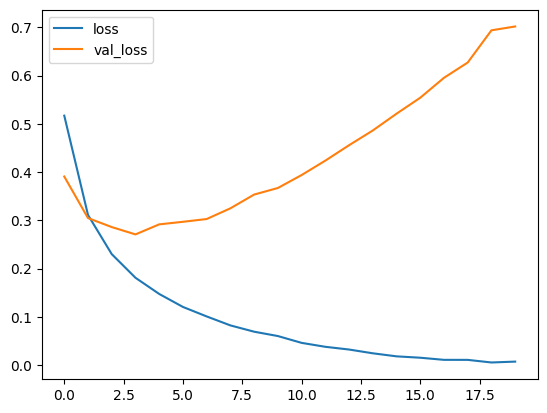

In [28]:
hist_df.plot(y=['loss','val_loss'])

In [15]:
# Train only 4 epoch avoid overfit

model = keras.Sequential(
    [
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4583 - accuracy: 0.8072
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2596 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2013 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2984 - accuracy: 0.8812


In [16]:
results

[0.29840755462646484, 0.8811600208282471]

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.predict(X_test)

782/782 [==============================] - 1s 889us/step


array([[0.2027603 ],
       [0.9997251 ],
       [0.8835224 ],
       ...,
       [0.10862482],
       [0.05941372],
       [0.53421736]], dtype=float32)